In [1]:
from google.colab import drive
drive.mount('/content/drive')
#ls drive/MyDrive/chat_api/dataset.xlsx

Mounted at /content/drive


In [2]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=12b3a960063210292962e82d4f22760fd02a0e54e530f57fd25bf0e2e246001c
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [4]:
!pip install torch --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [5]:
!pip install bert-score

In [ ]:
import pandas as pd
from bert_score import score as bert_score
from rouge_score import rouge_scorer
import numpy as np
import torch

# Загружаем данные
etalon = pd.read_excel('drive/MyDrive/chat_api/dataset_news/dataset.xlsx')
gpt4turbo = pd.read_excel('drive/MyDrive/chat_api/run_gpt/disser_1st_work.xlsx')
etalon.head()

,Unnamed: 0,Section(Russian),Section(English),Question(Russian),Question(English),Options(Russian),Option(English),Answer,Solution(Russian),Solution(English)
0,1,Алгебра,Algebra,Каким числом оканчавается выражение 9^121,What is the number that ends the expression 9^121,A) 1 B) 7 C) 3 D) 9 E) 5,A) 1 B) 7 C) 3 D) 9 E) 5,D,"Начнем с того, что 9^1 = 9, 9^2 = 81, 9^3 = 72...","Let's start with the fact that 9^1 = 9, 9^2 = ..."
1,2,Логика,Logic,Какое число соответсвует вопросительному знаку...,What number corresponds to the question mark: ...,A) 155 B) 75 C) 53 D) 99 E) 57,A) 155 B) 75 C) 53 D) 99 E) 57,C,Закономерность данного ряда следующая: к перво...,The pattern of this series is as follows: 2 is...
2,3,Логика,Logic,Какое число должно быть вместо вопросительного...,What number should be in place of the question...,A) 15 B) 25 C) 33 D) 45 E) 43,A) 15 B) 25 C) 33 D) 45 E) 43,B,Для выполнения данного задания необходимо допи...,"To complete this task, we need to add a number..."
3,4,Алгебра,Algebra,"Среднее арифметическое шести чисел равно 70, а...",The Algebra mean of six numbers is 70 and the ...,A) 85 B) 82 C) 17 D) 14 E) 36,A) 85 B) 82 C) 17 D) 14 E) 36,B,"Пусть сумма шести чисел равна S1, а сумма четы...","Let's denote the sum of six numbers as S1, and..."
4,5,Логика,Logic,"Замените буквы цифрами так, чтобы результат сл...",Replace the letters with digits so that the re...,A) произведение различных цифр кратно 120 B) п...,A) the product of different digits is a multip...,A,"Слагаемые - числа четырёхзначные, а сумма - чи...","The addends are four-digit numbers, and the su..."


In [ ]:
gpt4turbo.head()

,Unnamed: 0,q_num,p_num,question,options,answer,llm_answer,llm_option,Unnamed: 8,корректнее,обоснования к оценке,Unnamed: 11
0,4035,219,62,В классе 15 учеников. Необходимо послать по пу...,A) 455 B) 910 C) 54 D) 996 E) 816,A,Для решения данной задачи можно использовать ф...,A,5,NaN,NaN,1.0
1,4036,220,62,"Среднее арифметическое двух чисел равно 10,01....","A) 5,5 и 10,01 B) 4,51 и 5,5 C) 4,51 и 10,01 D...",E,"Пусть одно из чисел равно х, тогда второе числ...",E,5,NaN,NaN,2.0
2,4039,223,62,Арбуз и дыня вместе весят 13 кг. Арбуз тяжелее...,A) 8кг и 5 кг B) 7кг и 6 кг C) 9кг и 6 кг D) 9...,A,"Пусть вес дыни равен х кг, тогда вес арбуза бу...",A,5,NaN,NaN,3.0
3,4040,224,62,Вдоль аллеи высадили несколько берез. Потом ме...,A) 200 B) 227 C) 254 D) 281 E) 308,B,Пусть первоначально было высажено x берез. Тог...,B,1,ответ правильный но решение неправильное,NaN,4.0
4,4042,226,62,"Игральная кость - это маленький кубик, на кажд...",A) 1/3 B) 5/6 C) 1/6 D) 2/3 E) 1/4,B,Всего возможно 6 * 6 = 36 исходов бросания дву...,B,5,"Всего возможно 6 исходов при первом бросании, ...",NaN,5.0


## Dataset Cleaning

In [ ]:
import pandas as pd
from bert_score import score as bert_score
from rouge_score import rouge_scorer
import numpy as np
import torch

#Загружаем данные
#etalon = pd.read_excel('drive/MyDrive/chat_api/dataset_news/dataset.xlsx')
#gpt4turbo = pd.read_excel('drive/MyDrive/chat_api/run_gpt/disser_1st_work.xlsx')

etalon['Question(Russian)'] = etalon['Question(Russian)'].str.strip()
gpt4turbo['question'] = gpt4turbo['question'].str.strip()

gpt4turbo_edt = gpt4turbo[['question', 'llm_answer', 'llm_option']]
gpt4turbo_edt['rank'] = gpt4turbo_edt['llm_answer'].str.len()
gpt4turbo_edt = gpt4turbo_edt.sort_values('rank', ascending=False).drop_duplicates(subset=['question'])
gpt4turbo_edt = gpt4turbo_edt.drop(columns=['rank'])

gpt4turbo_edt.head()
# Подготавливаем данные для сравнения
# gpt4turbo_dif = pd.merge(etalon, gpt4turbo, left_on='Question(Russian)', right_on='question', how='inner')
# gpt4turbo_dif = gpt4turbo_dif[['Question(Russian)', 'Solution(Russian)', 'llm_answer', 'Answer', 'llm_option']]

# gpt4turbo_dif.head()

<ipython-input-9-7fb926826ced>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt4turbo_edt['rank'] = gpt4turbo_edt['llm_answer'].str.len()


,question,llm_answer,llm_option
35739,Сколькими способами можно записать число 2003 ...,Для решения задачи нужно перебрать все возможн...,A
34605,В коробке имеется 3 черных и 6 белых шаров. В ...,Решение:\n\nЕсть несколько способов решения эт...,B
14380,Найдите наименьшое натуралное трехзначное числ...,"Давайте последовательно проверять числа, начин...",C
32308,Возраст пенсионера Алтайбек ата равен сумме во...,Пусть возраст пенсионера Алтайбека равен x лет...,B
37457,"Если АА+АВ=СВА, то А+В+С равно",Решение:\n\nИз условия имеем: AA + AB = CVA\n\...,C


In [ ]:
not_null = pd.read_csv('drive/MyDrive/chat_api/run_gpt/remained_tasks_3_5.csv')
not_null = not_null.rename(columns={'Question(Russian)': 'question',
                                    'solution': 'llm_answer'})
not_null['llm_option'] = 0
not_null = not_null[['question', 'llm_answer', 'llm_option']]
not_null.head()

,question,llm_answer,llm_option
0,Каким числом оканчивается выражение 2018^2019?,"Для того чтобы определить, каким числом оканчи...",0
1,Каким числом оканчавается выражение 9^9876?,"Для того чтобы найти последнюю цифру числа, не...",0
2,"Даны числа а, в такие, что а+b>0 и а+2b<0. Опр...",Из условия задачи имеем:\n1. \( a + b > 0 \) ...,0
3,Усовершенствование полиграфических возможносте...,Давайте рассмотрим данную задачу шаг за шагом....,0
4,После того как магазин «Электроника» снизил це...,Обозначим исходную цену телевизора до снижения...,0


In [ ]:
print(gpt4turbo_edt.count(), not_null.count())

question      924
llm_answer    924
llm_option    924
dtype: int64 question      91
llm_answer    91
llm_option    91
dtype: int64


In [ ]:
gpt4turbo_edt = pd.concat([gpt4turbo_edt, not_null], ignore_index=True)

In [ ]:
gpt4turbo_edt.count()

,0
question,1015
llm_answer,1015
llm_option,1015


In [ ]:
# Подготавливаем данные для сравнения
gpt4turbo_dif = pd.merge(etalon, gpt4turbo_edt,
                         left_on='Question(Russian)',
                         right_on='question',
                         how='left')
gpt4turbo_dif = gpt4turbo_dif[['Section(Russian)', 'Question(Russian)', 'Solution(Russian)', 'Options(Russian)', 'llm_answer', 'Answer', 'llm_option', 'question']].rename(
                            columns={'Section(Russian)': 'section',
                                     'Question(Russian)': 'question_etalon',
                                     'Solution(Russian)': 'solution_etalon',
                                     'Options(Russian)': 'option_etalon',
                                     'llm_answer':'solution_llm',
                                     'question':'question_llm',
                                     'llm_option': 'llm_variant',
                                     'Answer':'etalon_variant'})

gpt4turbo_dif.head()

,section,question_etalon,solution_etalon,option_etalon,solution_llm,etalon_variant,llm_variant,question_llm
0,Алгебра,Каким числом оканчавается выражение 9^121,"Начнем с того, что 9^1 = 9, 9^2 = 81, 9^3 = 72...",A) 1 B) 7 C) 3 D) 9 E) 5,Решение:\n\nОпределим закономерность окончаний...,D,D,Каким числом оканчавается выражение 9^121
1,Логика,Какое число соответсвует вопросительному знаку...,Закономерность данного ряда следующая: к перво...,A) 155 B) 75 C) 53 D) 99 E) 57,"Чтобы получить число, следующее за каждым из д...",C,C,Какое число соответсвует вопросительному знаку...
2,Логика,Какое число должно быть вместо вопросительного...,Для выполнения данного задания необходимо допи...,A) 15 B) 25 C) 33 D) 45 E) 43,"Решение: \n\nМы можем заметить, что каждый наб...",B,B,Какое число должно быть вместо вопросительного...
3,Алгебра,"Среднее арифметическое шести чисел равно 70, а...","Пусть сумма шести чисел равна S1, а сумма четы...",A) 85 B) 82 C) 17 D) 14 E) 36,"Решение: \n\nПусть шесть чисел, среднее арифме...",B,B,"Среднее арифметическое шести чисел равно 70, а..."
4,Логика,"Замените буквы цифрами так, чтобы результат сл...","Слагаемые - числа четырёхзначные, а сумма - чи...",A) произведение различных цифр кратно 120 B) п...,"Решение:\n\nЗаметим, что последняя буква в лев...",A,A,"Замените буквы цифрами так, чтобы результат сл..."


In [ ]:
gpt4turbo_dif.count()

,0
section,913
question_etalon,913
solution_etalon,913
option_etalon,913
solution_llm,913
etalon_variant,913
llm_variant,913
question_llm,913


In [ ]:
gpt4turbo_dif.head()

,Question(Russian),Solution(Russian),llm_answer,Answer,llm_option
0,Каким числом оканчавается выражение 9^121,"Начнем с того, что 9^1 = 9, 9^2 = 81, 9^3 = 72...",Решение:\n\nОпределим закономерность окончаний...,D,D
1,Какое число соответсвует вопросительному знаку...,Закономерность данного ряда следующая: к перво...,"Чтобы получить число, следующее за каждым из д...",C,C
2,Какое число должно быть вместо вопросительного...,Для выполнения данного задания необходимо допи...,"Решение: \n\nМы можем заметить, что каждый наб...",B,B
3,"Среднее арифметическое шести чисел равно 70, а...","Пусть сумма шести чисел равна S1, а сумма четы...","Решение: \n\nПусть шесть чисел, среднее арифме...",B,B
4,"Замените буквы цифрами так, чтобы результат сл...","Слагаемые - числа четырёхзначные, а сумма - чи...","Решение:\n\nЗаметим, что последняя буква в лев...",A,A


## Проверяю, есть ли дубли или нет

In [ ]:
gpt4turbo_dif.count()

,0
Question(Russian),913
Solution(Russian),913
llm_answer,913
Answer,913
llm_option,913


In [ ]:
#gpt4turbo_dif[gpt4turbo_dif['Question(Russian)'].duplicated(keep=False)]
#gpt4turbo_dif[gpt4turbo_dif['Question(Russian)'].isin(gpt4turbo_dif['Question(Russian)'][gpt4turbo_dif['Question(Russian)'].duplicated()])].sort_values(by='Question(Russian)')

In [ ]:
# Подготавливаем данные для сравнения
# gpt4turbo_dif = pd.merge(etalon, gpt4turbo_edt, left_on='question', right_on='Question(Russian)', how='left')

gpt4turbo_dif = pd.merge(
    etalon,
    gpt4turbo_edt,
    left_on='Question(Russian)',  # Соединение по колонке Question(Russian) из etalon
    right_on='question',         # Соединение по колонке question из gpt4turbo_edt
    how='left'                   # Левое соединение: оставляем все записи из etalon
)

gpt4turbo_dif = gpt4turbo_dif[['Question(Russian)', 'question', 'Solution(Russian)', 'llm_answer', 'Answer', 'llm_option', 'Options(Russian)']]

nan_rows = gpt4turbo_dif[
    gpt4turbo_dif['Question(Russian)'].notnull() & gpt4turbo_dif['question'].isnull()
]

nan_rows.head()

,Question(Russian),question,Solution(Russian),llm_answer,Answer,llm_option,Options(Russian)


In [ ]:
nan_rows = nan_rows[['Question(Russian)', 'Options(Russian)']]
# Сохранение DataFrame в Excel файл
file_path = 'drive/MyDrive/chat_api/dataset_news/remained_tasks_3_5.xlsx'
nan_rows.to_excel(file_path, index=False)

# Скачивание файла на компьютер
from google.colab import files
files.download('drive/MyDrive/chat_api/dataset_news/remained_tasks_3_5.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nan_rows.count()

,0
Question(Russian),91
question,0
Solution(Russian),91
llm_answer,0
Answer,91
llm_option,0


In [ ]:
nan_rows = gpt4turbo_dif[gpt4turbo_dif[['question']].isnull()]
nan_rows.head()

,Question(Russian),question,Solution(Russian),llm_answer,Answer,llm_option
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gpt4turbo_dif.head()

,Question(Russian),Solution(Russian),llm_answer,Answer,llm_option,question
0,Каким числом оканчавается выражение 9^121,"Начнем с того, что 9^1 = 9, 9^2 = 81, 9^3 = 72...",Решение:\n\nОпределим закономерность окончаний...,D,D,Каким числом оканчавается выражение 9^121
1,Какое число соответсвует вопросительному знаку...,Закономерность данного ряда следующая: к перво...,"Чтобы получить число, следующее за каждым из д...",C,C,Какое число соответсвует вопросительному знаку...
2,Какое число должно быть вместо вопросительного...,Для выполнения данного задания необходимо допи...,"Решение: \n\nМы можем заметить, что каждый наб...",B,B,Какое число должно быть вместо вопросительного...
3,"Среднее арифметическое шести чисел равно 70, а...","Пусть сумма шести чисел равна S1, а сумма четы...","Решение: \n\nПусть шесть чисел, среднее арифме...",B,B,"Среднее арифметическое шести чисел равно 70, а..."
4,"Замените буквы цифрами так, чтобы результат сл...","Слагаемые - числа четырёхзначные, а сумма - чи...","Решение:\n\nЗаметим, что последняя буква в лев...",A,A,"Замените буквы цифрами так, чтобы результат сл..."


In [ ]:
import pandas as pd
from bert_score import score as bert_score
from rouge_score import rouge_scorer
import numpy as np
import torch

# Настраиваем GPU для модели BERTScore
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Подготавливаем расчет метрик
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)

# Функция для пакетного расчета BERTScore и ROUGE
def calculate_metrics_batch(dataset, batch_size=16):
    bert_scores_f1 = []
    rouge1_f1 = []
    rouge2_f1 = []

    for i in range(0, len(dataset), batch_size):
        batch = dataset[i:i + batch_size]

        # BERTScore
        _, _, F1 = bert_score(
            batch['solution_llm'].tolist(),
            batch['solution_etalon'].tolist(),
            lang="ru", device=device
        )
        bert_scores_f1.extend(F1.tolist())

        # ROUGE
        for _, row in batch.iterrows():
            rouge_scores = scorer.score(row['solution_etalon'], row['solution_llm'])
            rouge1_f1.append(rouge_scores['rouge1'].fmeasure)
            rouge2_f1.append(rouge_scores['rouge2'].fmeasure)

    dataset['BERTScore_F1'] = bert_scores_f1
    dataset['ROUGE1_F1'] = rouge1_f1
    dataset['ROUGE2_F1'] = rouge2_f1
    return dataset

# Применяем расчет метрик пакетами
gpt4turbo_dif_with_metrics = calculate_metrics_batch(gpt4turbo_dif)

# Выводим результаты
print("GPT 3.5 Results:")
print(gpt4turbo_dif_with_metrics)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

GPT 3.5 Results:
     section                                    question_etalon  \
0    Алгебра          Каким числом оканчавается выражение 9^121   
1     Логика  Какое число соответсвует вопросительному знаку...   
2     Логика  Какое число должно быть вместо вопросительного...   
3    Алгебра  Среднее арифметическое шести чисел равно 70, а...   
4     Логика  Замените буквы цифрами так, чтобы результат сл...   
..       ...                                                ...   
908   Логика  В коробке есть три красных, 3 желтых, 1 зелены...   
909   Логика  В коробке есть три красных, 3 желтых, 1 зелены...   
910   Логика  В слове МАТЕМАТИКА стерли 6 букв (возможно, ср...   
911   Логика  Восстановив порядок букв в каждой группе, вы п...   
912   Логика  Восстановив порядок букв в каждой группе, вы п...   

                                       solution_etalon  \
0    Начнем с того, что 9^1 = 9, 9^2 = 81, 9^3 = 72...   
1    Закономерность данного ряда следующая: к перво...   
2   

In [ ]:
gpt4turbo_dif_with_metrics.head()

,Question(Russian),Solution(Russian),llm_answer,Answer,llm_option,question,BERTScore_F1,ROUGE1_F1,ROUGE2_F1
0,Каким числом оканчавается выражение 9^121,"Начнем с того, что 9^1 = 9, 9^2 = 81, 9^3 = 72...",Решение:\n\nОпределим закономерность окончаний...,D,D,Каким числом оканчавается выражение 9^121,0.603773,0.055249,0.027701
1,Какое число соответсвует вопросительному знаку...,Закономерность данного ряда следующая: к перво...,"Чтобы получить число, следующее за каждым из д...",C,C,Какое число соответсвует вопросительному знаку...,0.702793,0.390244,0.000000
2,Какое число должно быть вместо вопросительного...,Для выполнения данного задания необходимо допи...,"Решение: \n\nМы можем заметить, что каждый наб...",B,B,Какое число должно быть вместо вопросительного...,0.651670,0.536585,0.153846
3,"Среднее арифметическое шести чисел равно 70, а...","Пусть сумма шести чисел равна S1, а сумма четы...","Решение: \n\nПусть шесть чисел, среднее арифме...",B,B,"Среднее арифметическое шести чисел равно 70, а...",0.767325,0.279570,0.109890
4,"Замените буквы цифрами так, чтобы результат сл...","Слагаемые - числа четырёхзначные, а сумма - чи...","Решение:\n\nЗаметим, что последняя буква в лев...",A,A,"Замените буквы цифрами так, чтобы результат сл...",0.686440,0.413793,0.070588


In [ ]:
save1 = gpt4turbo_dif_with_metrics#[['Question(Russian)', 'Solution(Russian)', 'llm_answer', 'BERTScore_F1', 'ROUGE1_F1', 'ROUGE2_F1']]
save1.to_excel('drive/MyDrive/chat_api/metrics_corr/gpt3_5_cmpre_results.xlsx', index=False)

In [ ]:
etalon = pd.read_excel('drive/MyDrive/chat_api/dataset_news/dataset.xlsx')
gpt4turbo = pd.read_csv('drive/MyDrive/chat_api/dataset_news/chatgpt4turbo_rus.csv')
gpt4o = pd.read_csv('drive/MyDrive/chat_api/dataset_news/chatgpt4o_rus.csv')

In [ ]:
!ls drive/MyDrive/chat_api/metrics/

api_gemini_english.csv	      gpt4o_en_results.xlsx	 gpt4turbo_rus_results.xlsx
api_gemini_russian.csv	      gpt4o_rus_results.xlsx
gemini_cmpre_05_results.xlsx  gpt4turbo_en_results.xlsx


In [ ]:
gpt4turbo.head()

,Question(Russian),Options(Russian),answers(Russian)
0,Каким числом оканчавается выражение 9^121,A) 1 B) 7 C) 3 D) 9 E) 5,Для определения последней цифры числа 9 в степ...
1,Какое число соответсвует вопросительному знаку...,A) 155 B) 75 C) 53 D) 99 E) 57,Последовательность чисел строится по следующем...
2,Какое число должно быть вместо вопросительного...,A) 15 B) 25 C) 33 D) 45 E) 43,Разница между 16 и 10 равна 6. Разница между 3...
3,"Среднее арифметическое шести чисел равно 70, а...",A) 85 B) 82 C) 17 D) 14 E) 36,Для начала найдем сумму первых шести чисел. С...
4,"Замените буквы цифрами так, чтобы результат сл...",A) произведение различных цифр кратно 120 B) п...,Разложим сложение столбиком:\n\n```\n УДАР\n+...


## English language tasks

In [6]:
import pandas as pd
from bert_score import score as bert_score
from rouge_score import rouge_scorer
import numpy as np
import torch

etalon = pd.read_excel('drive/MyDrive/chat_api/dataset_news/dataset.xlsx')
gpt4turbo = pd.read_excel('drive/MyDrive/chat_api/run_gpt/api_english_gpt_3_5.xlsx')

etalon['Question(English)'] = etalon['Question(English)'].str.strip()
gpt4turbo['question'] = gpt4turbo['question'].str.strip()

gpt4turbo_edt = gpt4turbo[['question', 'llm_answer', 'llm_option']]
gpt4turbo_edt['rank'] = gpt4turbo_edt['llm_answer'].str.len()
gpt4turbo_edt = gpt4turbo_edt.sort_values('rank', ascending=False).drop_duplicates(subset=['question'])
gpt4turbo_edt = gpt4turbo_edt.drop(columns=['rank'])

<ipython-input-6-e86304d3609b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt4turbo_edt['rank'] = gpt4turbo_edt['llm_answer'].str.len()


In [7]:
gpt4turbo_edt.count()

,0
question,925
llm_answer,925
llm_option,887


In [ ]:
nan_rows = gpt4turbo_dif[
    gpt4turbo_dif['Question(English)'].notnull() & gpt4turbo_dif['question'].isnull()
]

nan_rows.head()

KeyError: 'Question(English)'

In [8]:
not_null = pd.read_csv('drive/MyDrive/chat_api/run_gpt/remained_tasks_3_5_en.csv')
not_null = not_null.rename(columns={'Question(English)': 'question',
                                    'solution': 'llm_answer'})
not_null['llm_option'] = 0
not_null = not_null[['question', 'llm_answer', 'llm_option']]
not_null.head()

,question,llm_answer,llm_option
0,What is the number that ends the expression 9^121,To determine the number that ends the expressi...,0
1,The Algebra mean of six numbers is 70 and the ...,Let's denote the sum of the six numbers as \(S...,0
2,The Algebra mean of 3 numbers is 42. The Algeb...,Let's denote the sum of the first 3 numbers as...,0
3,A four-digit number xzzx is divisible by 5 and...,To determine the values of x and z in the four...,0
4,"In summer, a kilogram of strawberries costs 40...","To solve this problem, we first need to find o...",0


In [ ]:
not_null.count()

,0
question,32
llm_answer,32
llm_option,32


In [9]:
gpt4turbo_edt = pd.concat([gpt4turbo_edt, not_null], ignore_index=True)

In [10]:
# Подготавливаем данные для сравнения
gpt4turbo_dif = pd.merge(etalon, gpt4turbo_edt,
                         left_on='Question(English)',
                         right_on='question',
                         how='left')
gpt4turbo_dif = gpt4turbo_dif[['Section(English)', 'Question(English)', 'Solution(English)', 'Option(English)', 'llm_answer', 'Answer', 'llm_option', 'question']].rename(
                            columns={'Section(English)': 'section',
                                     'Question(English)': 'question_etalon',
                                     'Solution(English)': 'solution_etalon',
                                     'Options(English)': 'option_etalon',
                                     'llm_answer':'solution_llm',
                                     'question':'question_llm'})
gpt4turbo_dif.head()

,section,question_etalon,solution_etalon,Option(English),solution_llm,Answer,llm_option,question_llm
0,Algebra,What is the number that ends the expression 9^121,"Let's start with the fact that 9^1 = 9, 9^2 = ...",A) 1 B) 7 C) 3 D) 9 E) 5,To determine the number that ends the expressi...,D,0,What is the number that ends the expression 9^121
1,Logic,What number corresponds to the question mark: ...,The pattern of this series is as follows: 2 is...,A) 155 B) 75 C) 53 D) 99 E) 57,"To find the pattern in the given sequence, let...",C,C,What number corresponds to the question mark: ...
2,Logic,What number should be in place of the question...,"To complete this task, we need to add a number...",A) 155 B) 75 C) 53 D) 99 E) 57,"To solve this problem, we need to understand t...",B,E,What number should be in place of the question...
3,Algebra,The Algebra mean of six numbers is 70 and the ...,"Let's denote the sum of six numbers as S1, and...",A) 85 B) 82 C) 17 D) 14 E) 36,Let's denote the sum of the six numbers as \(S...,B,0,The Algebra mean of six numbers is 70 and the ...
4,Logic,Replace the letters with digits so that the re...,"The addends are four-digit numbers, and the su...",A) the product of different digits is a multip...,"To solve this math problem, we need to assign ...",A,C,Replace the letters with digits so that the re...


In [11]:
gpt4turbo_dif.count()

,0
section,911
question_etalon,911
solution_etalon,911
Option(English),911
solution_llm,910
Answer,911
llm_option,876
question_llm,910


### Загрузка нуллевых

In [ ]:
nan_rows = nan_rows[['Question(English)', 'Option(English)']]
# Сохранение DataFrame в Excel файл
file_path = 'drive/MyDrive/chat_api/dataset_news/remained_tasks_3_5_en.csv'
nan_rows.to_csv(file_path, index=False)

# Скачивание файла на компьютер
from google.colab import files
files.download('drive/MyDrive/chat_api/dataset_news/remained_tasks_3_5_en.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nan_rows.count()

,0
Question(English),32
question,0
Solution(English),32
llm_answer,0


In [14]:
gpt4turbo_dif = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gpt3_5_cmpre_results_en.xlsx')

In [15]:
gpt4turbo_dif.head()

,section,question_etalon,solution_etalon,Option(English),solution_llm,Answer,llm_option,question_llm
0,Algebra,What is the number that ends the expression 9^121,"Let's start with the fact that 9^1 = 9, 9^2 = ...",A) 1 B) 7 C) 3 D) 9 E) 5,To determine the number that ends the expressi...,D,0,What is the number that ends the expression 9^121
1,Logic,What number corresponds to the question mark: ...,The pattern of this series is as follows: 2 is...,A) 155 B) 75 C) 53 D) 99 E) 57,"To find the pattern in the given sequence, let...",C,C,What number corresponds to the question mark: ...
2,Logic,What number should be in place of the question...,"To complete this task, we need to add a number...",A) 15 B) 25 C) 33 D) 45 E) 43,"To solve this problem, we need to understand t...",B,E,What number should be in place of the question...
3,Algebra,The Algebra mean of six numbers is 70 and the ...,"Let's denote the sum of six numbers as S1, and...",A) 85 B) 82 C) 17 D) 14 E) 36,Let's denote the sum of the six numbers as \(S...,B,0,The Algebra mean of six numbers is 70 and the ...
4,Logic,Replace the letters with digits so that the re...,"The addends are four-digit numbers, and the su...",A) the product of different digits is a multip...,"To solve this math problem, we need to assign ...",A,C,Replace the letters with digits so that the re...


In [16]:
# Настраиваем GPU для модели BERTScore
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Подготавливаем расчет метрик
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)

# Функция для пакетного расчета BERTScore и ROUGE
def calculate_metrics_batch(dataset, batch_size=16):
    bert_scores_f1 = []
    rouge1_f1 = []
    rouge2_f1 = []

    for i in range(0, len(dataset), batch_size):
        batch = dataset[i:i + batch_size]

        # BERTScore
        _, _, F1 = bert_score(
            batch['solution_llm'].tolist(),
            batch['solution_etalon'].tolist(),
            lang="en", device=device
        )
        bert_scores_f1.extend(F1.tolist())

        # ROUGE
        for _, row in batch.iterrows():
            rouge_scores = scorer.score(row['solution_etalon'], row['solution_llm'])
            rouge1_f1.append(rouge_scores['rouge1'].fmeasure)
            rouge2_f1.append(rouge_scores['rouge2'].fmeasure)

    dataset['BERTScore_F1'] = bert_scores_f1
    dataset['ROUGE1_F1'] = rouge1_f1
    dataset['ROUGE2_F1'] = rouge2_f1
    return dataset

# Применяем расчет метрик пакетами
gpt4turbo_dif_with_metrics = calculate_metrics_batch(gpt4turbo_dif)
# Выводим результаты
print("Gemini English Results:")
print(gpt4turbo_dif_with_metrics)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

Gemini English Results:
     section                                    question_etalon  \
0    Algebra  What is the number that ends the expression 9^121   
1      Logic  What number corresponds to the question mark: ...   
2      Logic  What number should be in place of the question...   
3    Algebra  The Algebra mean of six numbers is 70 and the ...   
4      Logic  Replace the letters with digits so that the re...   
..       ...                                                ...   
906    Logic  There are three red, 3 yellow, 1 green and 2 b...   
907    Logic  There are three red, 3 yellow, 1 green and 2 b...   
908    Logic  In the word MATEMATIKA, 6 letters were erased ...   
909    Logic  Having restored the order of the letters in ea...   
910    Logic  Having restored the order of the letters in ea...   

                                       solution_etalon  \
0    Let's start with the fact that 9^1 = 9, 9^2 = ...   
1    The pattern of this series is as follows: 2 is... 

In [18]:
gpt4turbo_dif.head()

,section,question_etalon,solution_etalon,Option(English),solution_llm,Answer,llm_option,question_llm,BERTScore_F1,ROUGE1_F1,ROUGE2_F1
0,Algebra,What is the number that ends the expression 9^121,"Let's start with the fact that 9^1 = 9, 9^2 = ...",A) 1 B) 7 C) 3 D) 9 E) 5,To determine the number that ends the expressi...,D,0,What is the number that ends the expression 9^121,0.858898,0.442105,0.180851
1,Logic,What number corresponds to the question mark: ...,The pattern of this series is as follows: 2 is...,A) 155 B) 75 C) 53 D) 99 E) 57,"To find the pattern in the given sequence, let...",C,C,What number corresponds to the question mark: ...,0.869090,0.551724,0.167832
2,Logic,What number should be in place of the question...,"To complete this task, we need to add a number...",A) 15 B) 25 C) 33 D) 45 E) 43,"To solve this problem, we need to understand t...",B,E,What number should be in place of the question...,0.856507,0.349776,0.153846
3,Algebra,The Algebra mean of six numbers is 70 and the ...,"Let's denote the sum of six numbers as S1, and...",A) 85 B) 82 C) 17 D) 14 E) 36,Let's denote the sum of the six numbers as \(S...,B,0,The Algebra mean of six numbers is 70 and the ...,0.871282,0.506329,0.294872
4,Logic,Replace the letters with digits so that the re...,"The addends are four-digit numbers, and the su...",A) the product of different digits is a multip...,"To solve this math problem, we need to assign ...",A,C,Replace the letters with digits so that the re...,0.845078,0.357522,0.131439


In [19]:
save1 = gpt4turbo_dif_with_metrics
save1.to_excel('drive/MyDrive/chat_api/metrics_corr/gpt3_5_cmpre_results_enә.xlsx', index=False)

In [ ]:
save1.head()

,section,question_etalon,solution_etalon,Option(English),solution_llm,Answer,llm_option,question_llm,BERTScore_F1,ROUGE1_F1,ROUGE2_F1
0,Algebra,What is the number that ends the expression 9^121,"Let's start with the fact that 9^1 = 9, 9^2 = ...",A) 1 B) 7 C) 3 D) 9 E) 5,To determine the number that ends the expressi...,D,0,What is the number that ends the expression 9^121,0.858898,0.442105,0.180851
1,Logic,What number corresponds to the question mark: ...,The pattern of this series is as follows: 2 is...,A) 155 B) 75 C) 53 D) 99 E) 57,"To find the pattern in the given sequence, let...",C,C,What number corresponds to the question mark: ...,0.869090,0.551724,0.167832
2,Logic,What number should be in place of the question...,"To complete this task, we need to add a number...",A) 15 B) 25 C) 33 D) 45 E) 43,"To solve this problem, we need to understand t...",B,E,What number should be in place of the question...,0.856507,0.349776,0.153846
3,Algebra,The Algebra mean of six numbers is 70 and the ...,"Let's denote the sum of six numbers as S1, and...",A) 85 B) 82 C) 17 D) 14 E) 36,Let's denote the sum of the six numbers as \(S...,B,0,The Algebra mean of six numbers is 70 and the ...,0.871282,0.506329,0.294872
4,Logic,Replace the letters with digits so that the re...,"The addends are four-digit numbers, and the su...",A) the product of different digits is a multip...,"To solve this math problem, we need to assign ...",A,C,Replace the letters with digits so that the re...,0.845078,0.357522,0.131439


## Сравнение результатов

In [ ]:
import pandas as pd
gpt4turbo_en_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gpt3_5_cmpre_results_en.xlsx')
gpt4turbo_rus_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gpt3_5_cmpre_results.xlsx')

In [ ]:
en_gpt4turbo_bert_score_f1 = gpt4turbo_en_results['BERTScore_F1'].mean()
en_gpt4turbo_rouge1_f1 = gpt4turbo_en_results['ROUGE1_F1'].mean()
en_gpt4turbo_rouge2_f1 = gpt4turbo_en_results['ROUGE2_F1'].mean()

rus_gpt4turbo_bert_score_f1 = gpt4turbo_rus_results['BERTScore_F1'].mean()
rus_gpt4turbo_rouge1_f1 = gpt4turbo_rus_results['ROUGE1_F1'].mean()
rus_gpt4turbo_rouge2_f1 = gpt4turbo_rus_results['ROUGE2_F1'].mean()

print("English tasks, 3.5")
print("Среднее значение BERTScore F1:", en_gpt4turbo_bert_score_f1)
print("Среднее значение ROUGE-1 F1:", en_gpt4turbo_rouge1_f1)
print("Среднее значение ROUGE-2 F1:", en_gpt4turbo_rouge2_f1)

print("Russian tasks, 3.5")
print("Среднее значение BERTScore F1:", rus_gpt4turbo_bert_score_f1)
print("Среднее значение ROUGE-1 F1:", rus_gpt4turbo_rouge1_f1)
print("Среднее значение ROUGE-2 F1:", rus_gpt4turbo_rouge2_f1)

English tasks, 3.5
Среднее значение BERTScore F1: 0.8495901178580869
Среднее значение ROUGE-1 F1: 0.3264931699665575
Среднее значение ROUGE-2 F1: 0.1312539945199341
Russian tasks, 3.5
Среднее значение BERTScore F1: 0.7029710518439002
Среднее значение ROUGE-1 F1: 0.4041443903494855
Среднее значение ROUGE-2 F1: 0.19432009356814897


In [ ]:
import pandas as pd

# Данные для создания DataFrame
data = {
    'Language': ['English', 'Russian'],
    'Gemini_BERTScore_F1': [0.8470735986646626, 0.7280979566001289],
    'Gemini_ROUGE1_F1': [0.3223831819606806, 0.5100066219565519],
    'Gemini_ROUGE2_F1': [0.13627823432724934, 0.3167901405253221]
}

# Создание DataFrame
results_df = pd.DataFrame(data)
results_df.head()

,Language,Gemini_BERTScore_F1,Gemini_ROUGE1_F1,Gemini_ROUGE2_F1
0,English,0.847074,0.322383,0.136278
1,Russian,0.728098,0.510007,0.316790


In [ ]:
results_df.columns = pd.MultiIndex.from_tuples([
    ('Language', ' '),
    ('Gemini', 'BERTScore_F1'),
    ('Gemini', 'ROUGE1_F1'),
    ('Gemini', 'ROUGE2_F1'),
])
results_df.head()

Language       Gemini                    
           BERTScore_F1 ROUGE1_F1 ROUGE2_F1
0  English     0.847074  0.322383  0.136278
1  Russian     0.728098  0.510007  0.316790

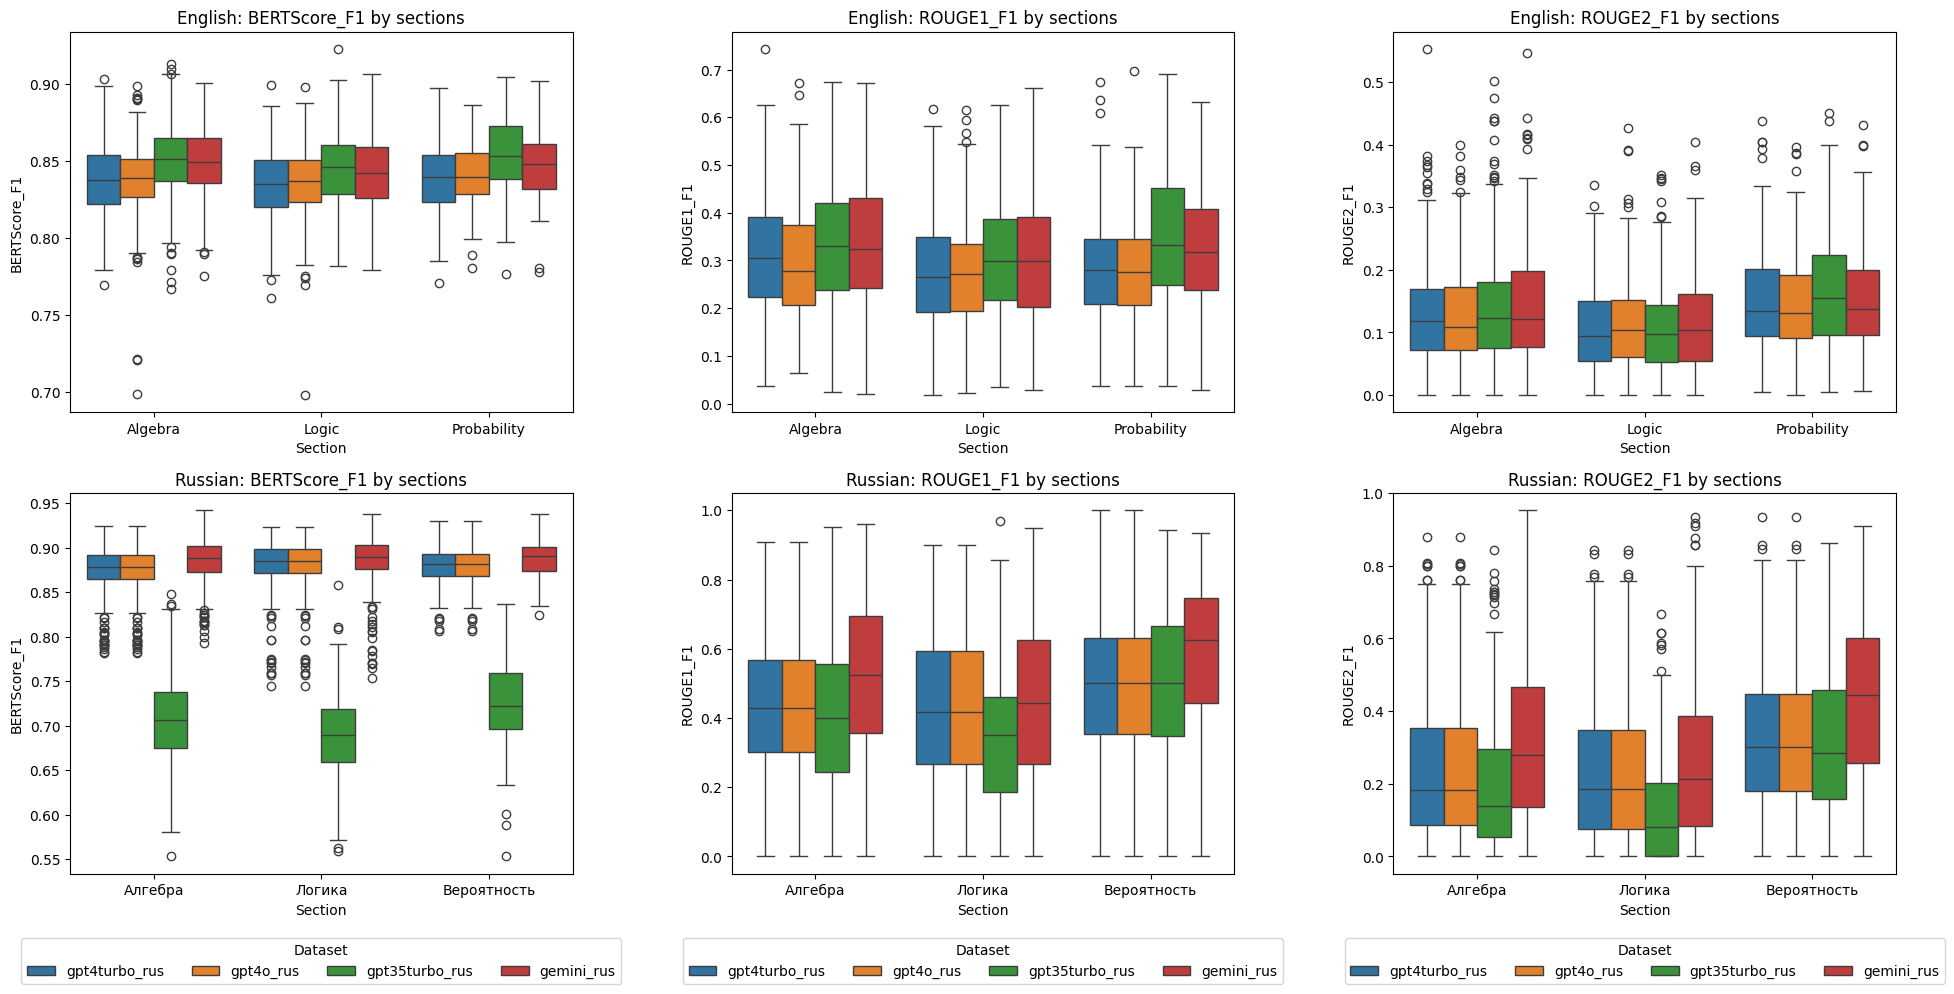

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gpt4turbo_en_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gpt4turbo_en_results.xlsx')
gpt4o_en_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gpt4o_en_results.xlsx')
gpt35turbo_en_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gpt3_5_cmpre_results_en.xlsx')
gemini_en_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gemini_cmpre_en_results.xlsx')

gpt4turbo_rus_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gpt4turbo_rus_results.xlsx')
gpt4o_rus_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gpt4o_rus_results.xlsx')
gpt35turbo_rus_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gpt3_5_cmpre_results_rus.xlsx')
gemini_ru_results = pd.read_excel('drive/MyDrive/chat_api/metrics_corr/gemini_cmpre_results_rus.xlsx')

# Добавим колонку "dataset" для каждого датафрейма, чтобы различать их
gpt4turbo_en_results['dataset'] = 'gpt4turbo_en'
gpt4o_en_results['dataset'] = 'gpt4o_en'

gpt4turbo_rus_results['dataset'] = 'gpt4turbo_rus'
gpt4o_rus_results['dataset'] = 'gpt4o_rus'

gpt35turbo_en_results['dataset'] = 'gpt35turbo_en'
gpt35turbo_rus_results['dataset'] = 'gpt35turbo_rus'

gemini_en_results['dataset'] = 'gemini_en'
gemini_ru_results['dataset'] = 'gemini_rus'

# Объединяем все датафреймы в один
all_results = pd.concat([gpt4turbo_en_results, gpt4o_en_results, gpt4turbo_rus_results, gpt4o_rus_results, gpt35turbo_en_results, gpt35turbo_rus_results, gemini_en_results, gemini_ru_results])

# Список метрик для отображения
metrics = ['BERTScore_F1', 'ROUGE1_F1', 'ROUGE2_F1']

# Создаем фигуру с двумя строками и тремя столбцами
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Разделяем данные на английский и русский
english_data = all_results[all_results['dataset'].str.contains('en')]
russian_data = all_results[all_results['dataset'].str.contains('rus')]

# Плотаем для каждой метрики
for i, metric in enumerate(metrics):
    # Для английского
    sns.boxplot(data=english_data, x='section', y=metric, hue='dataset', ax=axes[0, i])
    axes[0, i].set_title(f'English: {metric} by sections')
    axes[0, i].set_xlabel('Section')
    axes[0, i].set_ylabel(f'{metric}')

    # Для русского
    sns.boxplot(data=russian_data, x='section', y=metric, hue='dataset', ax=axes[1, i])
    axes[1, i].set_title(f'Russian: {metric} by sections')
    axes[1, i].set_xlabel('Section')
    axes[1, i].set_ylabel(f'{metric}')
for ax in axes.flatten():
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, title='Dataset')

axes[0, 0].legend_.remove()
axes[0, 1].legend_.remove()
axes[0, 2].legend_.remove()
# Подстройка макета
plt.tight_layout()
plt.show()

In [ ]:
gpt35turbo_rus_results.head()

,section,question_etalon,solution_etalon,option_etalon,solution_llm,etalon_variant,llm_variant,question_llm,BERTScore_F1,ROUGE1_F1,ROUGE2_F1,dataset
0,Алгебра,Каким числом оканчавается выражение 9^121,"Начнем с того, что 9^1 = 9, 9^2 = 81, 9^3 = 72...",A) 1 B) 7 C) 3 D) 9 E) 5,Решение:\n\nОпределим закономерность окончаний...,D,D,Каким числом оканчавается выражение 9^121,0.603773,0.055249,0.027701,gpt35turbo_rus
1,Логика,Какое число соответсвует вопросительному знаку...,Закономерность данного ряда следующая: к перво...,A) 155 B) 75 C) 53 D) 99 E) 57,"Чтобы получить число, следующее за каждым из д...",C,C,Какое число соответсвует вопросительному знаку...,0.702793,0.390244,0.000000,gpt35turbo_rus
2,Логика,Какое число должно быть вместо вопросительного...,Для выполнения данного задания необходимо допи...,A) 15 B) 25 C) 33 D) 45 E) 43,"Решение: \n\nМы можем заметить, что каждый наб...",B,B,Какое число должно быть вместо вопросительного...,0.651670,0.536585,0.153846,gpt35turbo_rus
3,Алгебра,"Среднее арифметическое шести чисел равно 70, а...","Пусть сумма шести чисел равна S1, а сумма четы...",A) 85 B) 82 C) 17 D) 14 E) 36,"Решение: \n\nПусть шесть чисел, среднее арифме...",B,B,"Среднее арифметическое шести чисел равно 70, а...",0.767325,0.279570,0.109890,gpt35turbo_rus
4,Логика,"Замените буквы цифрами так, чтобы результат сл...","Слагаемые - числа четырёхзначные, а сумма - чи...",A) произведение различных цифр кратно 120 B) п...,"Решение:\n\nЗаметим, что последняя буква в лев...",A,A,"Замените буквы цифрами так, чтобы результат сл...",0.686440,0.413793,0.070588,gpt35turbo_rus


In [ ]:
gemini_ru_results.head()

,section,question_etalon,solution_etalon,option_etalon,question_llm,solution_llm,BERTScore_F1,ROUGE1_F1,ROUGE2_F1,dataset
0,Алгебра,Каким числом оканчавается выражение 9^121,"Начнем с того, что 9^1 = 9, 9^2 = 81, 9^3 = 72...",A) 1 B) 7 C) 3 D) 9 E) 5,Каким числом оканчавается выражение 9^121,Для определения последней цифры числа 9 в степ...,0.908572,0.880000,0.791667,gemini_rus
1,Логика,Какое число соответсвует вопросительному знаку...,Закономерность данного ряда следующая: к перво...,A) 155 B) 75 C) 53 D) 99 E) 57,Какое число соответсвует вопросительному знаку...,Последовательность чисел строится по следующем...,0.895518,0.535714,0.296296,gemini_rus
2,Логика,Какое число должно быть вместо вопросительного...,Для выполнения данного задания необходимо допи...,A) 15 B) 25 C) 33 D) 45 E) 43,Какое число должно быть вместо вопросительного...,Разница между 16 и 10 равна 6. Разница между 3...,0.873969,0.680851,0.533333,gemini_rus
3,Алгебра,"Среднее арифметическое шести чисел равно 70, а...","Пусть сумма шести чисел равна S1, а сумма четы...",A) 85 B) 82 C) 17 D) 14 E) 36,"Среднее арифметическое шести чисел равно 70, а...",Для начала найдем сумму первых шести чисел. С...,0.906238,0.571429,0.121212,gemini_rus
4,Логика,"Замените буквы цифрами так, чтобы результат сл...","Слагаемые - числа четырёхзначные, а сумма - чи...",A) произведение различных цифр кратно 120 B) п...,"Замените буквы цифрами так, чтобы результат сл...",Разложим сложение столбиком:\n\n```\n УДАР\n+...,0.876277,0.203046,0.082051,gemini_rus


In [ ]:
import pandas as pd
from bert_score import score as bert_score
from rouge_score import rouge_scorer

# Подсчёт BERTScore
P, R, F1 = bert_score(data['solution'], data['Solution(English)'], lang="en")
data['BERTScore_P'] = P.tolist()
data['BERTScore_R'] = R.tolist()
data['BERTScore_F1'] = F1.tolist()

# Подсчёт ROUGE score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = data.apply(lambda row: scorer.score(row['Solution(English)'], row['solution']), axis=1)

# Извлечение метрик ROUGE
data['ROUGE1_P'] = [score['rouge1'].precision for score in rouge_scores]
data['ROUGE1_R'] = [score['rouge1'].recall for score in rouge_scores]
data['ROUGE1_F1'] = [score['rouge1'].fmeasure for score in rouge_scores]
data['ROUGE2_P'] = [score['rouge2'].precision for score in rouge_scores]
data['ROUGE2_R'] = [score['rouge2'].recall for score in rouge_scores]
data['ROUGE2_F1'] = [score['rouge2'].fmeasure for score in rouge_scores]
data['ROUGE_L_P'] = [score['rougeL'].precision for score in rouge_scores]
data['ROUGE_L_R'] = [score['rougeL'].recall for score in rouge_scores]
data['ROUGE_L_F1'] = [score['rougeL'].fmeasure for score in rouge_scores]

# Вывод результатов
print(data[['BERTScore_P', 'BERTScore_R', 'BERTScore_F1', 'ROUGE1_F1', 'ROUGE2_F1', 'ROUGE_L_F1']])

In [ ]:
gpt4turbo.count()

,0
task,911
answer_options,911
solution,911


In [ ]:
gpt4turbo.head()

,task,answer_options,solution
0,What is the number that ends the expression 9^121,A) 1 B) 7 C) 3 D) 9 E) 5,"To solve this problem, we need to determine th..."
1,What number corresponds to the question mark: ...,A) 155 B) 75 C) 53 D) 99 E) 57,"To find the pattern in the sequence 3, 5, 15, ..."
2,What number should be in place of the question...,A) 15 B) 25 C) 33 D) 45 E) 43,"To solve this task, we first need to identify ..."
3,The Algebra mean of six numbers is 70 and the ...,A) 85 B) 82 C) 17 D) 14 E) 36,"To solve this problem, we first need to find t..."
4,Replace the letters with digits so that the re...,A) the product of different digits is a multip...,"To solve the task, we first need to translate ..."


In [ ]:
gpt4o.head()

,Question(English),Options(Russian),Option(English),task,answer_options,solution
0,What is the number that ends the expression 9^121,A) 1 B) 7 C) 3 D) 9 E) 5,A) 1 B) 7 C) 3 D) 9 E) 5,What is the number that ends the expression 9^121,A) 1 B) 7 C) 3 D) 9 E) 5,We are tasked with finding the last digit of 9...
1,What number corresponds to the question mark: ...,A) 155 B) 75 C) 53 D) 99 E) 57,A) 155 B) 75 C) 53 D) 99 E) 57,What number corresponds to the question mark: ...,A) 155 B) 75 C) 53 D) 99 E) 57,"We are given the sequence: 3, 5, 15, 17, 51, a..."
2,What number should be in place of the question...,A) 15 B) 25 C) 33 D) 45 E) 43,A) 15 B) 25 C) 33 D) 45 E) 43,What number should be in place of the question...,A) 15 B) 25 C) 33 D) 45 E) 43,Let's break down the given pattern step by ste...
3,The Algebra mean of six numbers is 70 and the ...,A) 85 B) 82 C) 17 D) 14 E) 36,A) 85 B) 82 C) 17 D) 14 E) 36,The Algebra mean of six numbers is 70 and the ...,A) 85 B) 82 C) 17 D) 14 E) 36,"To solve this problem, we need to find the ove..."
4,Replace the letters with digits so that the re...,A) произведение различных цифр кратно 120 B) п...,A) the product of different digits is a multip...,Replace the letters with digits so that the re...,A) the product of different digits is a multip...,"We are given the equation УДАР + УДАР = ДРАКА,..."


In [ ]:
merged_df.head()

,Unnamed: 0,Section(Russian),Section(English),Question(Russian),Question(English)_x,Options(Russian)_x,Option(English)_x,Answer,Solution(Russian),Solution(English),Question(English)_y,Options(Russian)_y,Option(English)_y,task,answer_options,solution
0,1,Алгебра,Algebra,Каким числом оканчавается выражение 9^121,What is the number that ends the expression 9^121,A) 1 B) 7 C) 3 D) 9 E) 5,A) 1 B) 7 C) 3 D) 9 E) 5,D,"Начнем с того, что 9^1 = 9, 9^2 = 81, 9^3 = 72...","Let's start with the fact that 9^1 = 9, 9^2 = ...",What is the number that ends the expression 9^121,A) 1 B) 7 C) 3 D) 9 E) 5,A) 1 B) 7 C) 3 D) 9 E) 5,What is the number that ends the expression 9^121,A) 1 B) 7 C) 3 D) 9 E) 5,We are tasked with finding the last digit of 9...
1,2,Логика,Logic,Какое число соответсвует вопросительному знаку...,What number corresponds to the question mark: ...,A) 155 B) 75 C) 53 D) 99 E) 57,A) 155 B) 75 C) 53 D) 99 E) 57,C,Закономерность данного ряда следующая: к перво...,The pattern of this series is as follows: 2 is...,What number corresponds to the question mark: ...,A) 155 B) 75 C) 53 D) 99 E) 57,A) 155 B) 75 C) 53 D) 99 E) 57,What number corresponds to the question mark: ...,A) 155 B) 75 C) 53 D) 99 E) 57,"We are given the sequence: 3, 5, 15, 17, 51, a..."
2,3,Логика,Logic,Какое число должно быть вместо вопросительного...,What number should be in place of the question...,A) 15 B) 25 C) 33 D) 45 E) 43,A) 15 B) 25 C) 33 D) 45 E) 43,B,Для выполнения данного задания необходимо допи...,"To complete this task, we need to add a number...",What number should be in place of the question...,A) 15 B) 25 C) 33 D) 45 E) 43,A) 15 B) 25 C) 33 D) 45 E) 43,What number should be in place of the question...,A) 15 B) 25 C) 33 D) 45 E) 43,Let's break down the given pattern step by ste...
3,4,Алгебра,Algebra,"Среднее арифметическое шести чисел равно 70, а...",The Algebra mean of six numbers is 70 and the ...,A) 85 B) 82 C) 17 D) 14 E) 36,A) 85 B) 82 C) 17 D) 14 E) 36,B,"Пусть сумма шести чисел равна S1, а сумма четы...","Let's denote the sum of six numbers as S1, and...",The Algebra mean of six numbers is 70 and the ...,A) 85 B) 82 C) 17 D) 14 E) 36,A) 85 B) 82 C) 17 D) 14 E) 36,The Algebra mean of six numbers is 70 and the ...,A) 85 B) 82 C) 17 D) 14 E) 36,"To solve this problem, we need to find the ove..."
4,5,Логика,Logic,"Замените буквы цифрами так, чтобы результат сл...",Replace the letters with digits so that the re...,A) произведение различных цифр кратно 120 B) п...,A) the product of different digits is a multip...,A,"Слагаемые - числа четырёхзначные, а сумма - чи...","The addends are four-digit numbers, and the su...",Replace the letters with digits so that the re...,A) произведение различных цифр кратно 120 B) п...,A) the product of different digits is a multip...,Replace the letters with digits so that the re...,A) the product of different digits is a multip...,"We are given the equation УДАР + УДАР = ДРАКА,..."


## Сравнение результатов

In [ ]:
gpt4turbo_en_results = pd.read_excel('drive/MyDrive/chat_api/metrics/gpt4turbo_en_results.xlsx')
gpt4o_en_results = pd.read_excel('drive/MyDrive/chat_api/metrics/gpt4o_en_results.xlsx')

gpt4turbo_rus_results = pd.read_excel('drive/MyDrive/chat_api/metrics/gpt4turbo_rus_results.xlsx')
gpt4o_rus_results = pd.read_excel('drive/MyDrive/chat_api/metrics/gpt4o_rus_results.xlsx')

In [ ]:
en_gpt4turbo_bert_score_f1 = gpt4turbo_en_results['BERTScore_F1'].mean()
en_gpt4turbo_rouge1_f1 = gpt4turbo_en_results['ROUGE1_F1'].mean()
en_gpt4turbo_rouge2_f1 = gpt4turbo_en_results['ROUGE2_F1'].mean()

en_gpto_bert_score_f1 = gpt4o_en_results['BERTScore_F1'].mean()
en_gpto_rouge1_f1 = gpt4o_en_results['ROUGE1_F1'].mean()
en_gpto_rouge2_f1 = gpt4o_en_results['ROUGE2_F1'].mean()

rus_gpt4turbo_bert_score_f1 = gpt4turbo_rus_results['BERTScore_F1'].mean()
rus_gpt4turbo_rouge1_f1 = gpt4turbo_rus_results['ROUGE1_F1'].mean()
rus_gpt4turbo_rouge2_f1 = gpt4turbo_rus_results['ROUGE2_F1'].mean()

rus_gpto_bert_score_f1 = gpt4o_rus_results['BERTScore_F1'].mean()
rus_gpto_rouge1_f1 = gpt4o_rus_results['ROUGE1_F1'].mean()
rus_gpto_rouge2_f1 = gpt4o_rus_results['ROUGE2_F1'].mean()

print("English tasks, gpt4turbo")
print("Среднее значение BERTScore F1:", en_gpt4turbo_bert_score_f1)
print("Среднее значение ROUGE-1 F1:", en_gpt4turbo_rouge1_f1)
print("Среднее значение ROUGE-2 F1:", en_gpt4turbo_rouge2_f1)

print("English tasks, gpt4o")
print("Среднее значение BERTScore F1:", en_gpto_bert_score_f1)
print("Среднее значение ROUGE-1 F1:", en_gpto_rouge1_f1)
print("Среднее значение ROUGE-2 F1:", en_gpto_rouge2_f1)


print("Russian tasks, gpt4turbo")
print("Среднее значение BERTScore F1:", rus_gpt4turbo_bert_score_f1)
print("Среднее значение ROUGE-1 F1:", rus_gpt4turbo_rouge1_f1)
print("Среднее значение ROUGE-2 F1:", rus_gpt4turbo_rouge2_f1)

print("Russian tasks, gpt4o")
print("Среднее значение BERTScore F1:", rus_gpto_bert_score_f1)
print("Среднее значение ROUGE-1 F1:", rus_gpto_rouge1_f1)
print("Среднее значение ROUGE-2 F1:", rus_gpto_rouge2_f1)

In [ ]:
import pandas as pd

# Данные для создания DataFrame
data = {
    'Language': ['English', 'Russian'],
    'GPT4Turbo_BERTScore_F1': [0.8382547828463066, 0.8771100230161709],
    'GPT4Turbo_ROUGE1_F1': [0.2969389203906045, 0.44686494175505703],
    'GPT4Turbo_ROUGE2_F1': [0.12642419617518103, 0.2509101946116196],
    'GPT4O_BERTScore_F1': [0.8384790623657746, 0.877378559338657],
    'GPT4O_ROUGE1_F1': [0.28708984758113476, 0.4465255455032605],
    'GPT4O_ROUGE2_F1': [0.12582087028436154, 0.26228730210299644]
}

# Создание DataFrame
results_df = pd.DataFrame(data)
results_df.head()